# Assignment 2

Read all instructions carefully

## Work Requirements

- You must work on Assignment 2 alone. You may not work with partners.
- You may use online resources (Stack Exchange, Googling, Regex cheat sheets), including documentation and everything on Canvas. However, you may not use an LLM (ChatGPT, Copilot, etc)
- Lightly document your code, especially any decisions you make along the way. You do not need extensive documentation. You do **NOT** need a separate README file. But a person should be able to read your submission top to bottom and understand what you're doing.

## Submission Instructions

- This assignment is due on **Monday, October 6 at 6:59pm**.
- The assignment must be submitted on Canvas as a single PDF file together with a requirements.txt file (as a text file, not PDF). The two files must be submitted as separate files, not as a zip file.
- The PDF file you submit must be named with the following format "lastname_firstname_assignment2.pdf"
- The requirements.txt file should only include the libraries you need to run your code in a Jupyter notebook, with their versions properly specified (e.g., use pip freeze with your venv activated)

## Recommendations and Resources

**Recommendation:** Complete the assignment in a Jupyter notebook, and then convert the notebook to a PDF. If you have too much trouble converting to PDF, then convert it to HTML, open it as HTML and export that page to PDF (but this is a less preferred option).

**Recommendation:** As always, start by examining the data you read in and understand it. What does each row represent in each dataframe?

**Helpful Documentation:**
- Pandas expanding: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.expanding.html#pandas.DataFrame.expanding
- Python re library for Regex: https://docs.python.org/3/library/re.html
- Pareto: https://numpy.org/doc/stable/reference/random/generated/numpy.random.pareto.html#numpy.random.pareto
- Gaussian: https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html#numpy-random-normal
- Seaborn Boxplot: https://seaborn.pydata.org/generated/seaborn.boxplot.html
- Seaborn Scatterplot: https://seaborn.pydata.org/generated/seaborn.scatterplot.html
- Matplotlib scatterplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html
- Matplotlib boxplot: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html#

# Part 0 - Imports and CoW

In [ ]:
# Enforce Copy-on-Write

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

import re
pd.set_option("mode.copy_on_write", True) # will be the default in pandas 3.0, best to enforce it


 ## Data Observation
 bus.csv: appears to be a file containing data about restraunt, this data is composed of location, name, id... etc


 ins.csv: appears to be a file conatining information about recent inspections of restaunts,
 one key component to this file is that it appears to have an ID that is used to link that inspection to a specific description

ins2vio : appears to link the inspection to a specific description


based on observation of the key the ins, the iid appears to be a composite key composed of the id from bus.csv and a date

id connection

bus.csv <-> ins.csv <-> ins2vio.csv <-> vio.csv



# Part 1 - Regex, EDA, and Visualization

Load the Food Safety datasets (bus.csv, ins2vio.csv, ins.csv, and vio.csv) into pandas dataframes and answer the following questions based on the dataframes.

In [ ]:
#Load the datasets into Pandas DataFrames

cwd = Path().cwd()
project_folder = cwd.parent

bus_data_path = Path("data/bus.csv")
ins_data_path = Path("data/ins.csv")
ins2vio_data_path = Path("data/ins2vio.csv")
vio_data_path = Path("data/vio.csv")

bus_file = project_folder / bus_data_path
ins_file = project_folder / ins_data_path
ins2vio_file = project_folder / ins2vio_data_path
vio_file = project_folder / vio_data_path


In [ ]:
bus = pd.read_csv(bus_file)
ins = pd.read_csv(ins_file)
ins2vio = pd.read_csv(ins2vio_file)
vio = pd.read_csv(vio_file)

In [ ]:
#rename the id to make it easier to reference later
bus = bus.rename(columns = {"business id column":"bid"})

In [ ]:
bus.columns

In [ ]:
bus.shape

In [ ]:
ins.shape

Use the business dataset (bus) to answer the first few questions below

1.1) Examining the entries in `bus`, is the `bid` unique for each record (i.e. each row of data)?

Hint: use `value_counts()` or `unique()` to determine if the `bid` series has any duplicates.

In [ ]:
bid_unique_counts = bus["bid"].unique()
bid_unique_counts
#from here we can see that the number of ids is 6253, which is the same number of rows in the original shape

In [ ]:
#another way of checking uniques
bus["bid"].is_unique

1.2) In the two cells below create the following **two numpy arrays**:

1. Assign `top_names` to the top 5 most frequently used business names, from most frequent to least frequent.
2. Assign `top_addresses` to the top 5 addressses where businesses are located, from most popular to least popular.

Hint: you may find `value_counts()` helpful. 

In [ ]:
top_names = bus["name"].value_counts()[0:5]
top_names

In [ ]:
top_addresses = bus["address"].value_counts()[0:5]
top_addresses

1.3) Look at the businesses that DO NOT have the special MISSING ZIP code value. Some of the invalid postal codes are just the full 9 digit code rather than the first 5 digits. Create a new column named `postal5` in the original bus dataframe which contains only the first 5 digits of the postal_code column. Finally, for any of the likely MISSING postal5 ZIP code entries set the entry to None.

In [ ]:
#based on observation of the dataset I see that the special miss zip code value is represented as -9999

clean_bus = bus

clean_bus["postal5"] = clean_bus["postal_code"].str.slice(0,5)

clean_bus["postal5"] = np.where(clean_bus["postal5"] == "-9999", None, clean_bus["postal5"])



Now using the four Food Safety datasets bus.csv, ins2vio.csv, ins.csv, and vio.csv:

1.5) Create a side-by-side boxplot that shows the distribution of the restaurant scores for each different risk category from 2017 to 2019. Use a figure size of at least 12 by 8.

Hint: Consider using appropriate JOIN operations.


id connection

bus.csv <-> ins.csv <-> ins2vio.csv <-> vio.csv

### Task Steps

- I need to get the risk category,vid from the vio.csv
- ins2vio is the bridge that will connect to vid in vio.csv to an iid in ins.csv
- i need to get the score,date, and iid from the ins.csv
although the problem says to use the bus.csv I dont see much use for it here for this problem


ins:  is the dataset that represents the indivdual inspections
vio:  represents the type of violations that were seen during inspection
ins2vio : represent the bridge between the inspections and violations contains only iid and vid ;
it shows the iid of the inspection and vid together

so with this in mind it means that during an inspection there could have been multiple violations that
were recorded, meaning that in ins2vio a iid can appear multiple times,

ins contains the information for when a single inspection occured

so with this in mind when I merge together ins with vio using ins2vio; I should see a larger dataframe created as an inspection could have multiple violations

ins2vio has a shape of (40210, 2)
ins has a shape of (24885,4)
and them merged created a new dataframe of 37455, indicating that for some locations there were multiple
violations
during merge we only care about restraunts that had violations as these are the only 
ones that would have a link to the "risk_category" column inside of vio.csv

In [74]:
#first filter our the relevent restraunts based on the dates specified

ins_2017_2019 = ins[ins["date"].str.contains("2017") | ins["date"].str.contains("2018")| ins["date"].str.contains("2019")]

#join this new dataframe with the vio.csv using ins2vio as a bridge
#idea join ins with ins2vio using the iid

merged_ins_vio_id = ins_2017_2019.merge(ins2vio, on='iid')


In [75]:
ins2vio.shape

(40210, 2)

In [76]:
merged_ins_vio_id.shape

(37455, 5)

In [77]:
ins_2017_2019.shape


(24885, 4)

In [73]:
#final merge to link ins(2017-2019) to the violations df
merged_ins_vio = merged_ins_vio_id.merge(vio, on='vid')
merged_ins_vio.shape


(37455, 7)

<Axes: xlabel='score', ylabel='risk_category'>

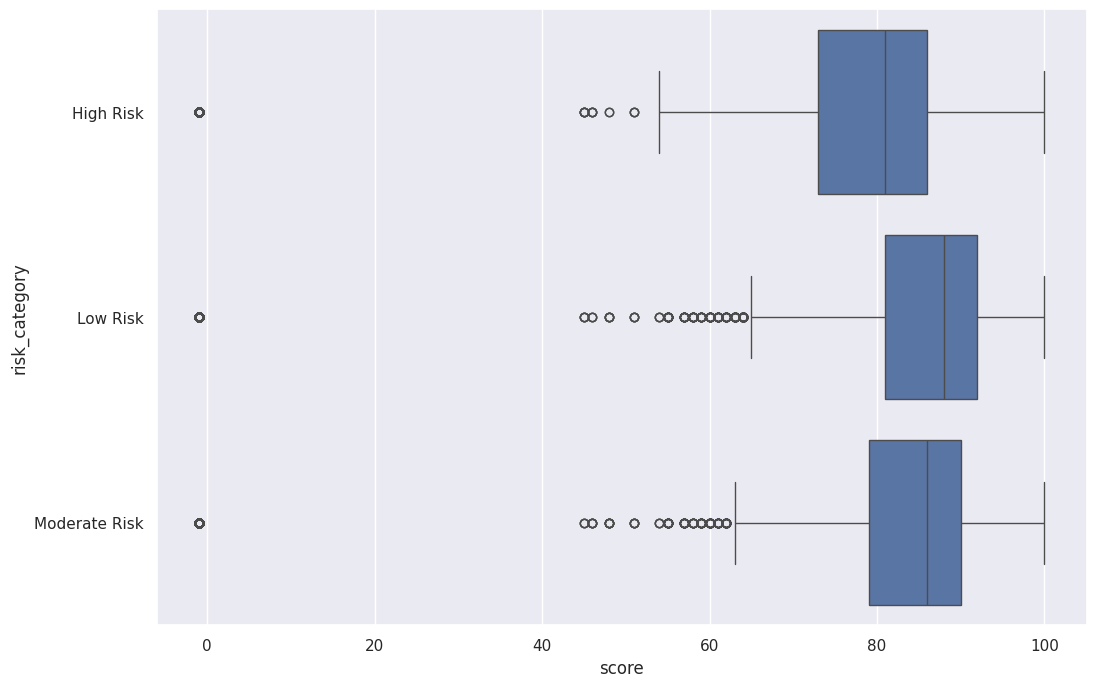

In [80]:
sns.set_theme(rc={'figure.figsize': (12, 8)})
sns.boxplot(merged_ins_vio, x = "score", y ="risk_category")

## Observation

From viewing the plots we can see that there are three distinct risk categoris low, moderate, and high risk


the general trend that we can see is that for the restraunts had the lowest scores were the ones that
 generally had highrisk violations, followed by the moderate, and then low

this is evidenced by the fact that the median for score for the low_risk violations corresponded was higher, followed then by moderate, then finally highrisk

we can also see that the general trend of the score tended to be more spread out for the lowwer quartile then the upper quartile for all the categories, maybe indicating that depending on the type of
violation given there was different types of deductions given leading to more spread in these score, as opposed to higher score indicating they roughly lost the same number of points; one good think that could be analyzed is the type of violations, and scores and seeing what violations above the median were score were given the most


# Part II - Making a Synthetic Dataset

In this part you're going to be create a synthetic dataset (dataframe) with 1000 observations (rows). You are going to use random number generators to create the data for you.

You can use either the numpy or scipy library, whichever you find easier. Be sure to import any libraries you use at the top of the ntoebook (not down here).

In [186]:
n = 10000

In [187]:
#Optional: set random seed for reproducibility (how you do it depends on whether yo uuse numpy or scipy to generate the random numbers)
np.random.seed(42)

2.1) Create a variable "v1" of 10,000 numbers where y = 3x+4 is the value of the element at index x, i.e., [4, 7, 10, ...] (Done for you)

In [188]:
v1 = 3 * np.arange(n) + 4

In [189]:
v1[0:10]

array([ 4,  7, 10, 13, 16, 19, 22, 25, 28, 31])

2.2) Create a list of 10,000 samples from a normal (Gaussian) distribution with mean = 0 and variance = 10.

HINT: Pay attention to whether the argument to your number generator is variance or standard deviation. (It doesn't have to be a python list, it can be an array or dataframe, or whatever dtype is most convenient for you.)

In [190]:
# noise = np.random.normal... (can also use scipy)
#normal takes STD
noise = np.random.normal(0,  np.sqrt(10), size = n)

In [169]:
noise[0:10]

array([ 1.57074807, -0.43723011,  2.04817099,  4.81624329, -0.74045799,
       -0.74040607,  4.99390941,  2.4268417 , -1.48460836,  1.71572551])

2.3) Create a variable v2 = v1 + Gaussian noise, using the noise your created above

In [191]:
v2 = v1 + noise

In [192]:
v2[0:10]

array([ 5.57074807,  6.56276989, 12.04817099, 17.81624329, 15.25954201,
       18.25959393, 26.99390941, 27.4268417 , 26.51539164, 32.71572551])

2.4) Create a variable v3 = exp(v1) that exponentiates the libear variable in v1, also sometimes denoted e^(v1), e.g., v3[0] = e^4

In [193]:
v3 = np.exp(v1)

/tmp/ipykernel_17521/706569660.py:1: RuntimeWarning: overflow encountered in exp
  v3 = np.exp(v1)


In [173]:
v3[0:10]

array([5.45981500e+01, 1.09663316e+03, 2.20264658e+04, 4.42413392e+05,
       8.88611052e+06, 1.78482301e+08, 3.58491285e+09, 7.20048993e+10,
       1.44625706e+12, 2.90488497e+13])

2.5) Create a list v4 = exp(v1) + Gaussian noise, using the same noise variable you created earlier

In [194]:
v4 = np.exp(v1)+ noise

/tmp/ipykernel_17521/629621035.py:1: RuntimeWarning: overflow encountered in exp
  v4 = np.exp(v1)+ noise


2.6) Create a list v5 = exp(v1 + Gaussian noise), using the same noise variable you created earlier

In [195]:
v5 = np.exp(v1 + noise)

/tmp/ipykernel_17521/373284339.py:1: RuntimeWarning: overflow encountered in exp
  v5 = np.exp(v1 + noise)


2.7) Create a dataframe with 10,000 rows and columns = [v1, v2, v3, v4, v5, noise]

In [196]:
df_full = np.array([v1, v2, v3, v4, v5, noise]).T
df_full = pd.DataFrame(df_full, columns = ["v1","v2","v3","v4","v5","noise"])

In [181]:
df_full.head()

<bound method NDFrame.head of        v1          v2             v3             v4             v5     noise
0     4.0    5.570748   5.459815e+01   5.616890e+01   2.626305e+02  1.570748
1     7.0    6.562770   1.096633e+03   1.096196e+03   7.082307e+02 -0.437230
2    10.0   12.048171   2.202647e+04   2.202851e+04   1.707868e+05  2.048171
3    13.0   17.816243   4.424134e+05   4.424182e+05   5.463817e+07  4.816243
4    16.0   15.259542   8.886111e+06   8.886110e+06   4.237746e+06 -0.740458
..    ...         ...            ...            ...            ...       ...
95  289.0  284.371959  3.244182e+125  3.244182e+125  3.170829e+123 -4.628041
96  292.0  292.936415  6.516115e+126  6.516115e+126  1.662143e+127  0.936415
97  295.0  295.825529  1.308797e+128  1.308797e+128  2.988099e+128  0.825529
98  298.0  298.016170  2.628788e+129  2.628788e+129  2.671642e+129  0.016170
99  301.0  300.258170  5.280062e+130  5.280062e+130  2.514586e+130 -0.741830

[100 rows x 6 columns]>

2.8) For each variable (v2, v3, v4, v5) create a separate scatter plot with v1 on the x-axis. Remark on your general observations.

<Axes: xlabel='v1', ylabel='v2'>

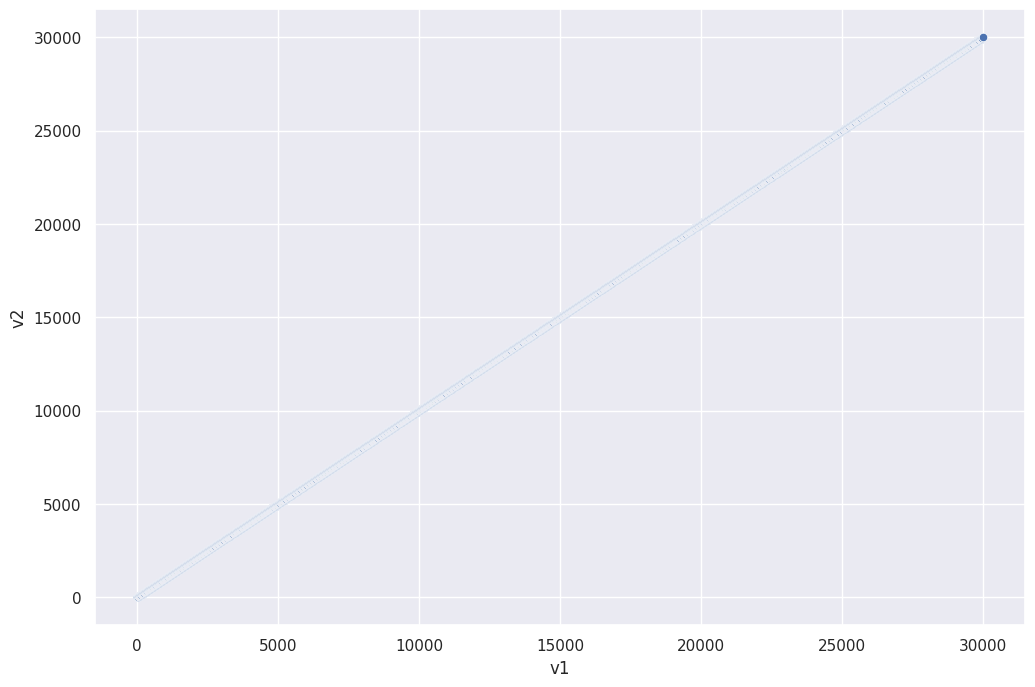

In [197]:
# Code for plots here, and remarks and observations here
sns.scatterplot(data=df_full, x="v1", y="v2")


/home/alvaro/DataspellProjects/CS_577_A2/.venv/lib/python3.12/site-packages/matplotlib/ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


<Axes: xlabel='v1', ylabel='v3'>

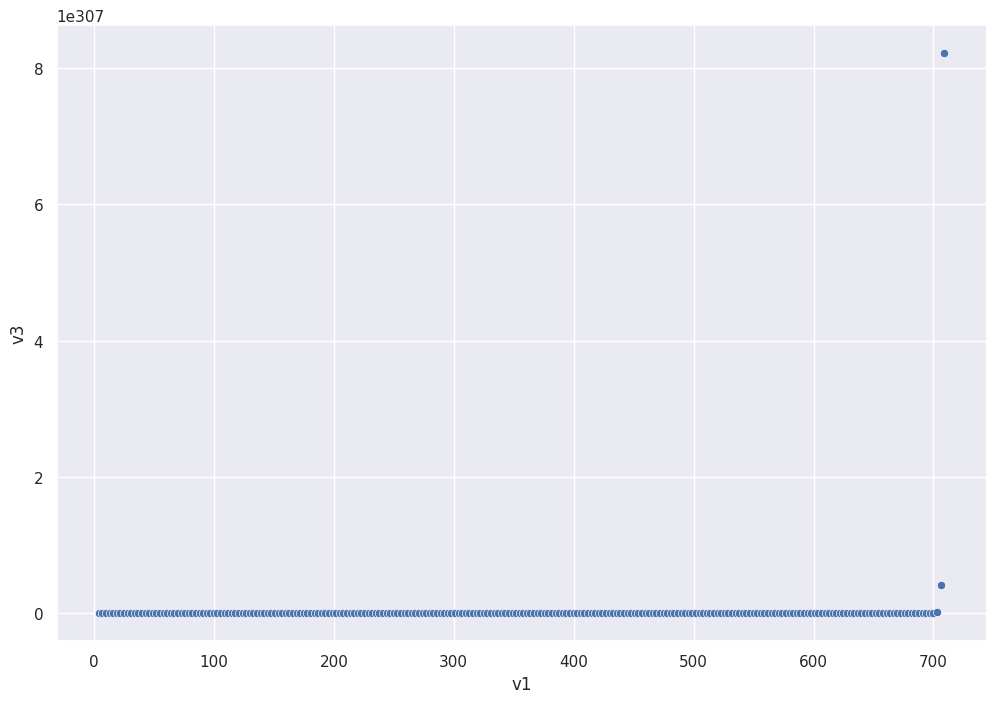

In [198]:
sns.scatterplot(data=df_full, x="v1", y="v3")


/home/alvaro/DataspellProjects/CS_577_A2/.venv/lib/python3.12/site-packages/matplotlib/ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


<Axes: xlabel='v1', ylabel='v4'>

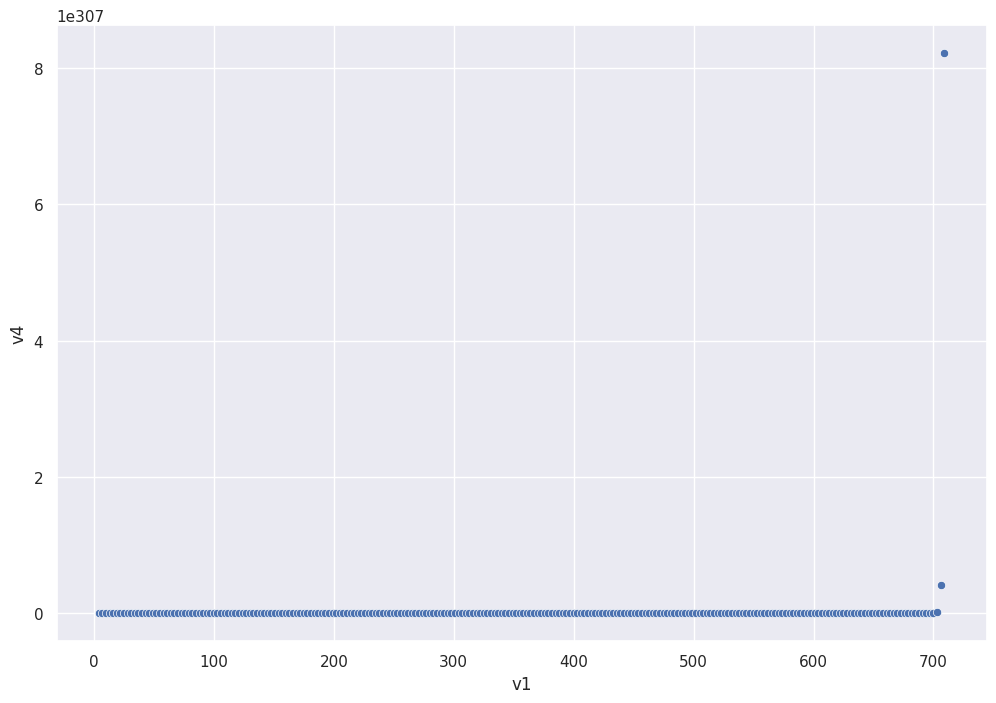

In [199]:
sns.scatterplot(data=df_full, x="v1", y="v4")


<Axes: xlabel='v1', ylabel='v5'>

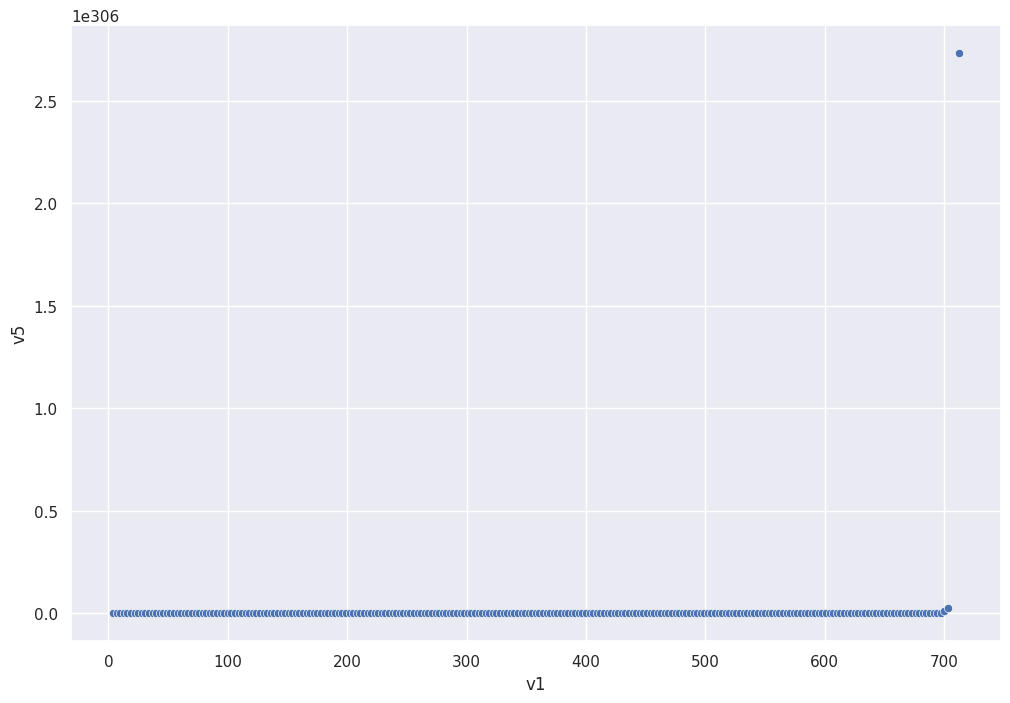

In [200]:
sns.scatterplot(data=df_full, x="v1", y="v5")


2.9)  Create pair of boxplots with v4 and v5 next to each other. Remark on how v4 and v5 compare, based on the violin plots and the scatter plots. You may use other plots or tools if helpful.

/home/alvaro/DataspellProjects/CS_577_A2/.venv/lib/python3.12/site-packages/matplotlib/ticker.py:2178: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


<Axes: >

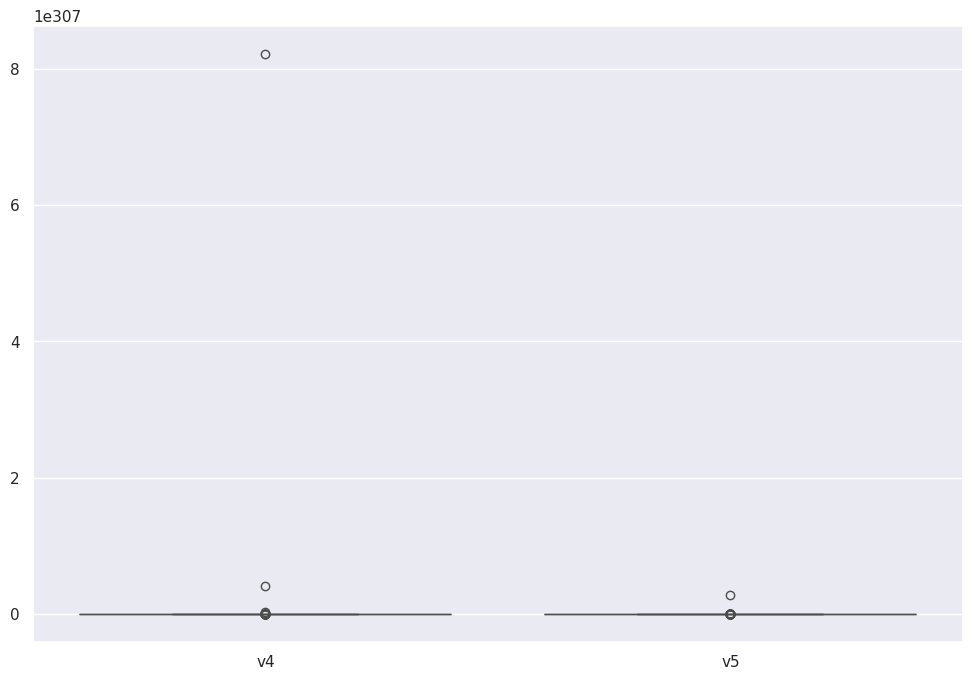

In [201]:
sns.boxplot(data=df_full[["v4","v5"]])

## Part III - Sampling and Convergence

3.1) Create a variable "pareto" that is a list of 10,000 samples from a Pareto distribution with shape parameter = 1.2 (usually denoted a or alpha). Add this list "pareto" as a column to your dataframe from Part II

In [ ]:
#pareto = np.random.pareto... (can also use scipy)

3.2) Add two more columns to your dataframe labeled "running_avg_normal" and "running_avg_pareto". In the "running_avg_normal" column put the running average of the (unsorted) values in the noise column. For example, if the values in the noise column are [0.1, 0.3, 0.5, ...] then the running average should be [0.1, 0.2, 0.3, ...]. Do the same for the Pareto column.

HINT: Check out the .expanding() and .mean() methods for pandas Series objects

3.3) Create a lineplot for running_avg_normal and a lineplot for running_avg_Pareto. Remark on your observations.